# 1. One-step binomial tree

Define:
- $S_0$ is current stock price and $f$ is the call option price
- The strike price is $K$
- Stock price can go up to $S_0 u$ or go down to $S_0 d$
- Interest rate is $r$
- The time maturity is $T$

Assume that the data is as same as we have in our lecture note. Then, we can define a fuction to get the option price $f$ as follows:

In [6]:
def oneStepBinomialCall(K, S0, u, d, T, r):
    import numpy as np
    # option price in two possible cases
    f_u = np.max([S0*u-K, 0])
    f_d = np.max([S0*d-K, 0])
    # probability move up
    p = (np.exp(r*T)-d)/(u-d)
    # option price
    f = np.exp(-r*T)*(p*f_u + (1-p)*f_d)
    return f

In [7]:
oneStepBinomialCall(K=21, S0=20, u=1.1, d=0.9, T=0.25, r=0.12)

0.6329950990317132

In [8]:
?oneStepBinomialCall # return nothing

However, it is better to write down more documentation for a function, so that we can understand it more clearly:

In [11]:
def oneStepBinomialCall(K, S0, u, d, T, r):
    """
    This function calculates the option price of a call option.
    Keyword arguments:
    K -- the strike price
    S0 -- the current stock price
    u -- the go-up factor (e.g., u = 1.1 for go up 10%)
    d -- the go-down factor (e.g., d = 0.9 for go down 10%)
    T -- time to maturity (e.g., T = 0.25 for 3-month call option)
    r -- interest rate (e.g., r = 0.12 for 12%)
    """
    import numpy as np
    # option price in two possible cases
    f_u = np.max([S0*u-K, 0])
    f_d = np.max([S0*d-K, 0])
    # probability move up
    p = (np.exp(r*T)-d)/(u-d)
    # option price
    f = np.exp(-r*T)*(p*f_u + (1-p)*f_d)
    return f

In [13]:
?oneStepBinomialCall

But, we can use the `if` condition to calculate for both call and put option:

In [29]:
def oneStepBinomial(call=True, K=21, S0=20, u=1.1, d=0.9, T=0.25, r=0.12):
    """
    This function calculates the option price of a call option by a one-step binomial model.
    Keyword arguments:
    call -- call or put option (default is a call option)
    K -- the strike price
    S0 -- the current stock price
    u -- the go-up factor (e.g., u = 1.1 for go up 10%)
    d -- the go-down factor (e.g., d = 0.9 for go down 10%)
    T -- time to maturity (e.g., T = 0.25 for 3-month call option)
    r -- interest rate (e.g., r = 0.12 for 12%)
    """
    import numpy as np
    # option price in two possible cases
    if (call == True):
        f_u = np.max([S0*u - K, 0])
        f_d = np.max([S0*d - K, 0])
    else:
        f_u = np.max([K - S0*u, 0])
        f_d = np.max([K - S0*d, 0])
    # probability move up
    p = (np.exp(r*T)-d)/(u-d)
    # option price
    f = np.exp(-r*T)*(p*f_u + (1-p)*f_d)
    return f

In [30]:
oneStepBinomial(call=False, K=52, S0=60, u=1.2, d=0.8, T=1, r=0.05)

1.4147530940085673

In [31]:
oneStepBinomial(call=False, K=52, S0=40, u=1.2, d=0.8, T=1, r=0.05)

9.463930074037126

# 2. Two-step binomial tree

A two-step binomial tree includes:
- Two middle nodes: each is one-step binomial tree ($f_u$ and $f_d$)
- And one initial node at present ($f$)

Let's take example from our lecture note (Section 3): the price at the two middle nodes:

In [36]:
f_u = oneStepBinomial(call=True, K=21, S0=22, u=1.1, d=0.9, T=0.25, r=0.12)
f_u

2.0255843169014844

In [35]:
f_d = oneStepBinomial(call=True, K=21, S0=18, u=1.1, d=0.9, T=0.25, r=0.12)
f_d

0.0

At the initial node, it is just the the expected value of possible cases, discounted to the present:

In [38]:
p = (np.exp(0.12*0.25)-0.9)/(1.1-0.9)
f = np.exp(-0.12*0.25)*(p*f_u + (1-p)*f_d)
f

1.2821849452741405

Of course, we can wrap as a function too:

In [39]:
def twoStepBinomial(call=True, K=21, S0=20, u=1.1, d=0.9, T=0.25, r=0.12):
    """
    This function calculates the option price of a option by two-step binomial models.
    Keyword arguments:
    call -- call or put option (default is a call option)
    K -- the strike price
    S0 -- the current stock price
    u -- the go-up factor (e.g., u = 1.1 for go up 10%)
    d -- the go-down factor (e.g., d = 0.9 for go down 10%)
    T -- time to maturity (e.g., T = 0.25 for 3-month call option)
    r -- interest rate (e.g., r = 0.12 for 12%)
    """
    import numpy as np
    # option price in two middle nodes
    f_u = oneStepBinomial(call=call, K=K, S0=S0*u, u=u, d=d, T=T, r=r)
    f_d = oneStepBinomial(call=call, K=K, S0=S0*d, u=u, d=d, T=T, r=r)

    # probability move up
    p = (np.exp(r*T)-d)/(u-d)

    # option price at initial node
    f = np.exp(-r*T)*(p*f_u + (1-p)*f_d)
    return f

In [40]:
twoStepBinomial(call=True, K=21, S0=20, u=1.1, d=0.9, T=0.25, r=0.12)

1.2821849452741405

# 3. Plot the binomial tree

I borrow a function from Yuxing Yang (2017) to draw the plot:

In [47]:
def binomial_grid(n):
    import networkx as nx
    G=nx.Graph()
    for i in range(0,n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={}
    for node in G.nodes():
        posG[node]=(node[0],n+2+node[0]-2*node[1])
    nx.draw(G,pos=posG)

Then apply to our example of two-step tree above:

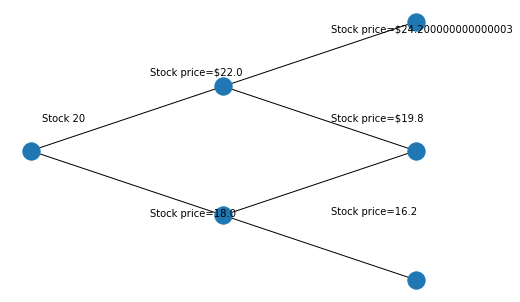

In [48]:
# our data
u = 1.1
d = 0.9
S0 = 20
S_u = S0*u
S_d = S0*d
S_uu = S_u*u
S_ud = S_u*d
S_dd = S_d*d

# plot it
import matplotlib.pyplot as plt
plt.figtext(0.08,0.6, 'Stock ' + str(S0))
plt.figtext(0.33,0.76, 'Stock price=$' + str(S_u))
plt.figtext(0.33,0.27, 'Stock price=' + str(S_d))
plt.figtext(0.75,0.91, 'Stock price=$' + str(S_uu))
plt.figtext(0.75,0.6, 'Stock price=$' + str(S_ud))
plt.figtext(0.75,0.28, 'Stock price=' + str(S_dd))
binomial_grid(n=2)
plt.show()